<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/Assignment%202b/SIX/cuDFVSPandas_file2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment: Alternatives to Pandas for Processing Large Datasets**


**Group Members:**

<table>
  <tr>
    <th>Name</th>
    <th>Matric</th>
  </tr>
  <tr>
    <th>LEE MING QI</th>
    <th>A20EC0064</th>
  </tr>

  <tr>
    <th>AMIRAH RAIHANAH BINTI ABDUL RAHIM</th>
    <th>A20EC0182</th>
  </tr>
    <tr>
    <th>SINGTHAI SRISOI</th>
    <th>A20EC0147</th>
  </tr>
    <tr>
    <th>NUR IRDINA ALIAH BINTI ABDUL WAHAB</th>
    <th>A20EC0115</th>
  </tr>
</table>

### **1. Pandas**
Pandas is a popular open source Python package for data science/data analysis and machine learning tasks. It is built on top of Numpy, another package that supports multidimensional arrays.It has functions for analyzing, cleaning, exploring, and manipulating data.

### **2. cuDF(RAPIDS)**
RAPIDS uses CUDA primitives for low-level compute optimization, but exposes GPU parallelism and high memory bandwidth via user-friendly Python interfaces. End-to-end data science workflows are supported by RAPIDS, from data loading and preprocessing to machine learning, graph analytics, and visualisation.


---



---



>In this assignment, we will perform few methods on the large dataset from Rate.csv dataset using 2 libraries which are Pandas and cuDF(RAPIDS). We will analyze and compare the performance of these 2 libraries using 3 methods which are read csv, finding missing values and fill in missing values.

>The dataset we are using is Rate.csv (1.97 GB), which is accessible on Kaggle throught the link. https://www.kaggle.com/datasets/hhs/health-insurance-marketplace?select=Rate.csv


##**`Pandas Vs cuDF(RAPIDS)`**

In [ ]:
import pandas as pd
import random
from sklearn.linear_model import LogisticRegression
from google.colab import drive

drive.mount("/content/drive")


Mounted at /content/drive


# **`Pandas Library`**

>**1. Load data using Pandas**

Load data from .CSV file into notebook.

In [ ]:
filename = '/content/drive/MyDrive/Rate.csv'

In [ ]:
%%time
load_pandas = pd.read_csv(filename)

CPU times: user 21 s, sys: 5.5 s, total: 26.5 s
Wall time: 37.9 s


>**2. Isna function using Pandas**

Isna function is used to return boolean values TRUE if the data is missing value or false otherwise.

In [ ]:
%%time
load_pandas.isna()

CPU times: user 4.5 s, sys: 78 ms, total: 4.57 s
Wall time: 4.57 s


,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12694440,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,False
12694441,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,False
12694442,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,False
12694443,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,False


>**3. Fillna function using Pandas library**

Fillna function is used to fill in missing values with fillna method.

In [ ]:
%%time
#load_pandas.fillna({'IndividualTobaccoRate': 'Unknown'})
load_pandas['IndividualTobaccoRate'].fillna(0, inplace=True)
display(load_pandas)

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,29.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,0.0,73.9,107.61,107.61,107.61,144.56,144.56,144.56,14
2,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,0.0,73.9,107.61,107.61,107.61,144.56,144.56,144.56,15
3,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
4,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12694440,2016,WV,96480,SERFF,2,2015-08-20 12:28:36,96480,13-5123390,2016-01-01,2016-12-31,...,14.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2033
12694441,2016,WV,96480,SERFF,2,2015-08-20 12:28:36,96480,13-5123390,2016-01-01,2016-12-31,...,14.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2034
12694442,2016,WV,96480,SERFF,2,2015-08-20 12:28:36,96480,13-5123390,2016-01-01,2016-12-31,...,14.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2035
12694443,2016,WV,96480,SERFF,2,2015-08-20 12:28:36,96480,13-5123390,2016-01-01,2016-12-31,...,14.05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2036


CPU times: user 4.52 s, sys: 801 ms, total: 5.33 s
Wall time: 5.31 s


**Next, we will take a look if we use cuDF(RAPIDS) library compared to Pandas.**

# **`cuDF(RAPIDS) Library`**

>Firstly, install cuDF(RAPIDS) library in google collaboratory.

In [ ]:
!nvidia-smi

Wed Jan 11 16:24:51 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
pip install cudf-cu11 --extra-index-url=https://pypi.ngc.nvidia.com

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.8/442.8 MB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 453.6/453.6 KB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 87.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 84.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 94.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the followi

Library succesfully installed, now import the library.

In [ ]:
import cudf

>**1. Load data using cuDF(RAPIDS)**

Load data from .CSV file into notebook.

In [ ]:
%%time
load_pandas_cudf = cudf.read_csv(filename)

CPU times: user 1.6 s, sys: 743 ms, total: 2.34 s
Wall time: 9.8 s


> **2. Isna function using cuDF(RAPIDS)**

Isna function is used to return boolean values TRUE if the data is missing value or false otherwise.

In [ ]:
%%time
load_pandas_cudf.isna()

CPU times: user 29.6 ms, sys: 18.3 ms, total: 47.9 ms
Wall time: 85.4 ms


,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12694440,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,False
12694441,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,False
12694442,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,False
12694443,False,False,False,False,False,False,False,False,False,False,...,False,True,True,True,True,True,True,True,True,False


> **3. Fillna function to replace missing values using cuDF(RAPIDS)**

Fillna function is used to fill in missing values with fillna method.

In [ ]:
%%time
load_pandas_cudf['IndividualTobaccoRate'].fillna(0, inplace=True)
display(load_pandas_cudf)

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,29.00,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,14
1,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,0.0,73.9,107.61,107.61,107.61,144.56,144.56,144.56,14
2,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,0.0,73.9,107.61,107.61,107.61,144.56,144.56,144.56,15
3,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.00,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,15
4,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,32.00,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12694440,2016,WV,96480,SERFF,2,2015-08-20 12:28:36,96480,13-5123390,2016-01-01,2016-12-31,...,14.05,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2033
12694441,2016,WV,96480,SERFF,2,2015-08-20 12:28:36,96480,13-5123390,2016-01-01,2016-12-31,...,14.05,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2034
12694442,2016,WV,96480,SERFF,2,2015-08-20 12:28:36,96480,13-5123390,2016-01-01,2016-12-31,...,14.05,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2035
12694443,2016,WV,96480,SERFF,2,2015-08-20 12:28:36,96480,13-5123390,2016-01-01,2016-12-31,...,14.05,0.0,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,2036


CPU times: user 133 ms, sys: 1.59 ms, total: 135 ms
Wall time: 156 ms


# **`Comparison of Pandas Vs cuDF(RAPIDS) Performance`**

**After running the code above, we will obtain the result and the CPU runtime. We can see the difference on the CPU time and compare both Pandas and cuDF(RAPIDS). We will visualize the comparison for better understanding using bar graph.**


<table>
  <tr>
    <th>METHOD</th>
    <th>PANDAS</th>
    <th>CUDF(RAPIDS)</th>
  </tr>
  <tr>
    <th>Load data </th>
    <th>37.9s</th>
    <th>9.8s</th>
  </tr>

  <tr>
    <th>Isna()</th>
    <th>4.57s</th>
    <th>0.0854s</th>
  </tr>
    <tr>
    <th>Fillna()</th>
    <th>5.31s</th>
    <th>0.156s</th>
</table>




In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

columns = ['Read', 'Isna', 'Fillna']
result = pd.DataFrame({'Pandas': [37.9,4.57,5.31], 'cuDF(RAPIDS)': [9.8, 0.0854, 0.156]}, index = columns)
result



,Pandas,cuDF(RAPIDS)
Read,37.90,9.8000
Isna,4.57,0.0854
Fillna,5.31,0.1560


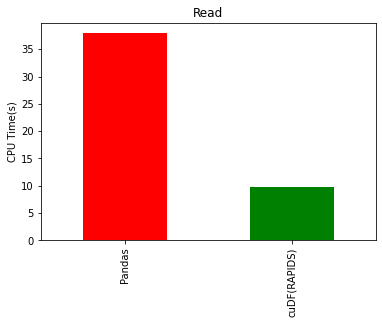

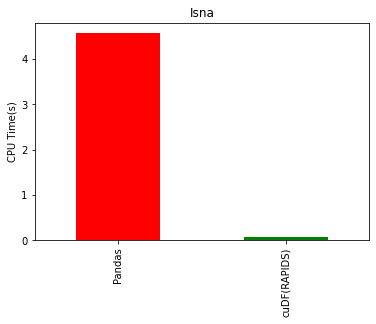

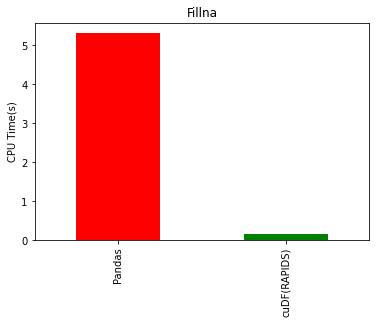

In [12]:
c = ['red', 'green']
for columns in result.index:
  result.loc[columns].plot(kind='bar', title=columns, color=c)
  plt.ylabel("CPU Time(s)")
  plt.show()

#**Findings and Conclusion**

>Based on the first barchart Read, the red bar represents Pandas and the green bar represents cuDF(RAPIDS). We can tell that **cuDF(RAPIDS) perform better** as it only takes **9.8s** to read the csv file compared to the **Pandas** that took **37.9s which are 3 times slower**. Next, the **Isna chart** also tells the same as the **cuDF(RAPIDS) faster compared to Pandas**. It took only **0.0854s** and **Pandas took 4.7s** which is a **huge difference** between the two libraries. Lastly, Fillna barchart tells us that **cuDF(RAPIDS) took 0.156s** and **Pandas took 5.31s** which again cuDF(RAPIDS) remain as the fastest library. 

>To conclude, cuDF(RAPIDS) is faster than Pandas because cuDF uses Apache Arrow Columnar Layout which is a memory columnar format used to represent structured datasets.This columnar format is fast and allows computationally intensive operations to be performed as efficiently as possible while handling and iterating large datasets. On the other hand, Pandas work on CPUs that only have 8 cores which tend to cause delays and took longer time to compute. All in all, cuDF(RAPIDS) library is a better option for you to process massive data as it will provide you with less processing time, accelerate loading and manipulating date while enabling user to perform computer-intensive operations fast.






